***2-1: How many decision trees exist with n binary attributes?***

2^(2^n)

***2-2 : What is the entropy of the output Y?***

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import os
from math import log, e
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
dataA = [0, 1, 0, 1, 0, 1]
dataB = [1, 1, 0, 1, 1, 0]
dataC = [1, 1, 0, 0, 0, 1]
dataY = [0, 0, 0, 1, 1, 1]
dataAll = [dataA, dataB, dataC, dataY]
dataAll = np.swapaxes(dataAll, 0, 1)
df = pd.DataFrame(data=dataAll, columns=['A', 'B', 'C', 'Y'])

print(df)

   A  B  C  Y
0  0  1  1  0
1  1  1  1  0
2  0  0  0  0
3  1  1  0  1
4  0  1  0  1
5  1  0  1  1


In [4]:
value,counts = np.unique(dataY, return_counts=True)
entropyParent = entropy (counts)
print("entropy of output: " + str(entropyParent))


entropy of output: 0.6931471805599453


***Using the information gain criterion, what is the first node you would split at? Explain clearly why?***

In [5]:
child1=dict()
child2=dict()
entropy1=dict()
entropy2=dict()
weightedEntropy=dict()
infoGain=dict()
totalData=float(len(dataY))

In [6]:
attr='A'

child1[attr] = [2, 1]
child2[attr] = [1, 2]
entropy1[attr] = entropy(child1[attr])
entropy2[attr] = entropy(child2[attr])

weightedEntropy[attr] = (np.sum(child1[attr]) 
                         * entropy1[attr] 
                         + np.sum(child2[attr]) 
                         * entropy2[attr]) / totalData
infoGain[attr] = entropyParent - weightedEntropy[attr]
print("info gain for "+ str(attr)+": " + str(infoGain[attr]))

info gain for A: 0.05663301226513251


In [7]:
attr='B'

child1[attr] = [1, 1]
child2[attr] = [2, 2]
entropy1[attr] = entropy(child1[attr])
entropy2[attr] = entropy(child2[attr])

weightedEntropy[attr] = (np.sum(child1[attr]) 
                         * entropy1[attr] 
                         + np.sum(child2[attr]) 
                         * entropy2[attr]) / totalData
infoGain[attr] = entropyParent - weightedEntropy[attr]
print("info gain for "+ str(attr)+": " + str(infoGain[attr]))

info gain for B: 0.0


In [8]:
attr='C'

child1[attr] = [1, 2]
child2[attr] = [2, 1]
entropy1[attr] = entropy(child1[attr])
entropy2[attr] = entropy(child2[attr])

weightedEntropy[attr] = (np.sum(child1[attr]) 
                         * entropy1[attr] 
                         + np.sum(child2[attr]) 
                         * entropy2[attr]) / totalData
infoGain[attr] = entropyParent - weightedEntropy[attr]
print("info gain for "+ str(attr)+": " + str(infoGain[attr]))
print("Hence, I will split at either A or C, as A and C both have higher information gain than B.")

info gain for C: 0.05663301226513251
Hence, I will split at either A or C, as A and C both have higher information gain than B.


***Using the information gain criterion, complete the learning of the decision tree for this dataset. Draw the decision tree and comment if the tree is unique.***

In [9]:
feature_cols = ['A',  'C']
x = df[feature_cols] # Features
y = df.Y # Target variable

train = dict()
test = dict()
train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size=0, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(train['x'],train['y'])

#Predict the response for test dataset
# y_pred = clf.predict(X_test)

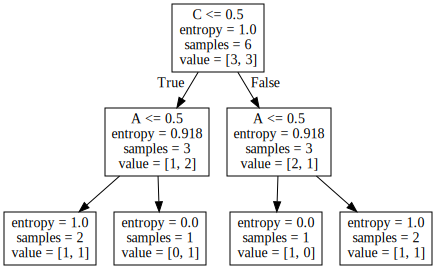

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from graphviz import Source

from sklearn import tree
Source( tree.export_graphviz(clf, out_file=None, feature_names=feature_cols))
from IPython.display import SVG
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=feature_cols))
SVG(graph.pipe(format='svg'))

Tree is not unique, as the root node can either be A or C.

***2-3: Plot the training points and, by inspection, draw a linear classifier that separates the
data with maximum margin.***

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

negClass = [[1,5],[1,6],[3,3]]

posClass = [[-1,3],[0,2],[0,1],[0,0]]
negClass=np.array(negClass)
posClass=np.array(posClass)

labels=[0,0,0,1,1,1,1]

# data =dict()
# data['x'] = np.concatenate((negClass[:,0],posClass[:,0]),axis=0)
# data['y'] = np.concatenate((negClass[:,1],posClass[:,1]),axis=0)

# print(data['x'])
# print(data['y'])
# graph=plt.scatter(data['x'],data['y'])
# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")



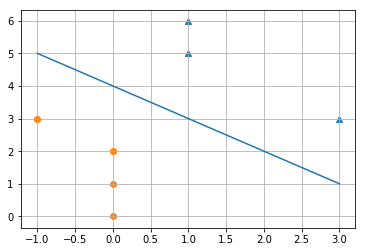

In [12]:
fig,ax=plt.subplots(1,1)
ax.scatter(negClass[:,0], negClass[:,1], marker='^')
ax.scatter(posClass[:,0], posClass[:,1], marker='o')
ax.plot([-1,3],[5,1])
plt.grid()

In [13]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

X_train=np.concatenate((negClass,posClass),axis=0)
print(X_train)
#Train the model using the training sets
clf.fit(X_train, labels)

#Predict the response for test dataset
# y_pred = clf.predict(X_test)

[[ 1  5]
 [ 1  6]
 [ 3  3]
 [-1  3]
 [ 0  2]
 [ 0  1]
 [ 0  0]]


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

***The linear SVM is parameterized by h(x) = (w^t)(x) + b. What are the parameters w
and b for this problem?***

Ans: w is a vector whose direction is perpendicular to the line representing the linear classifier. b is the amount of displacement of the linear classifier from the origin.

w^T * (-1-3,5-1) = w^T * (-1,1) * 4 =0

Hence, w = (1,1), |w| = sqrt(2)

Let a point on the hyperline be xi=(-1,5)

w^T * xi + b = 4 + b = 0

Hence, b = 4




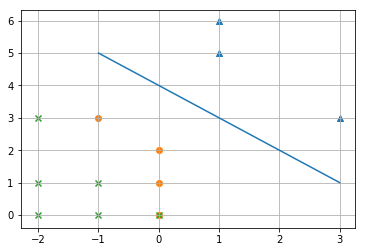

In [14]:
newData=[[-2,0],[-2,1],[-2,3],[-1,0],[-1,1],[0,0]]
newData=np.array(newData)
fig,ax=plt.subplots(1,1)
ax.scatter(negClass[:,0], negClass[:,1], marker='^')
ax.scatter(posClass[:,0], posClass[:,1], marker='o')
ax.scatter(newData[:,0], newData[:,1], marker='x')
ax.plot([-1,3],[5,1])
ax.grid()

No change in w or b, i.e. w is still (1,1) and b is still 4, because the nearest data points to the hyperline remain the same two data points as before, i.e. points (0,2) and (1,5).

***2-4: Is it possible that Classifier 1 has higher accuracy than Classifier 2, but Classifier 2 has both higher precision and higher recall than Classifier 1?***

In [51]:
print("Yes, it is possible.\n")
[tn1,fn1,fp1,tp1]=np.array([95,2,3,0]).astype(float)
[tn2,fn2,fp2,tp2]=np.array([25,25,25,25]).astype(float)
total1=tn1 + fn1 + fp1 + tp1
total2=tn2 + fn2 + fp2 + tp2
table1 = pd.DataFrame([[tn1,fn1],[fp1,tp1]],columns=["0_actual","1_actual"],index=["0_predict","1_predict"])
table2 = pd.DataFrame([[tn2,fn2],[fp2,tp2]],columns=["0_actual","1_actual"],index=["0_predict","1_predict"])
print("-"*30)
print("Table1")
print(table1)
accuracy=(tp1+tn1)/total1
precision=tp1/(tp1+fp1)
recall=tp1/(tp1+fn1)
print("\naccuracy: {:.2f} \nprecision: {:.2f} \nrecall: {:.2f}".format(accuracy,precision,recall))
print("-"*30)
print("Table2")
print(table2)
accuracy=(tp2+tn2)/total2
precision=tp2/(tp2+fp2)
recall=tp2/(tp2+fn2)
print("\naccuracy: {:.2f} \nprecision: {:.2f} \nrecall: {:.2f}".format(accuracy,precision,recall))
print("-"*30)
print("Hence, table2 has higher precision and recall but lower accuracy than table 1.")

Yes, it is possible.

------------------------------
Table1
           0_actual  1_actual
0_predict      95.0       2.0
1_predict       3.0       0.0

accuracy: 0.95 
precision: 0.00 
recall: 0.00
------------------------------
Table2
           0_actual  1_actual
0_predict      25.0      25.0
1_predict      25.0      25.0

accuracy: 0.50 
precision: 0.50 
recall: 0.50
------------------------------
Hence, table2 has higher precision and recall but lower accuracy than table 1.


***2-5: Compute the performance of various machine learning algorithms (see below) on this
dataset for predicting the whether the diagnosis is malignant or benign.***

Use a random split of 70% of the data for training and 30% for testing. Repeat this process 20 times and compute the average performance for both the training and testing stages.
Algorithms:

• DT1: Decision Tree with Information Gain

• DT2: Same as DT1 with limited tree size, vary the number of levels to beat DT1 if you can.

• SVM1: SVM with linear kernel

• SVM2: SVM with RBF kernel

• SVM3: Same as SVM2 but with regularization (soft margin), Choose C to beat SVM1 and SVM2 if you can.

In [16]:
dataAttr=["Sample code number"
           ,"Clump Thickness"
           ,"Uniformity of Cell Size"
           ,"Uniformity of Cell Shape"
           ,"Marginal Adhesion"
           ,"Single Epithelial Cell Size"
           ,"Bare Nuclei"
           ,"Bland Chromatin"
           ,"Normal Nucleoli"
           ,"Mitoses"
           ,"Class"]

df = pd.read_csv("breast-cancer-wisconsin.data",delimiter=",",header=None)
# df2 = df.rename(columns={0:"id"})
# print(df2)
resColLabels=["trainAccu","testAccu","precision","recall"]
resRowLabels=["DT1","DT2","SVM1","SVM2","SVM3"]
resultsTable=pd.DataFrame(columns=resColLabels,index=resRowLabels)


In [17]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
x=np.array(x)
y=np.array(y)
x=x.astype(int)
y=y.astype(int)

train = dict()
test = dict()
# train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

accuTrain=[]
accuTest=[]
prec=[]
recall=[]

for epoch in range(20):
    train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size=0.3, random_state=1)
    # Train Decision Tree Classifer
    clf = clf.fit(train['x'],train['y'])

    #Predict the response for test dataset
    y_pred_train = clf.predict(train['x'])
    accuTrain.append(metrics.accuracy_score(train['y'], y_pred_train))

    #Predict the response for test dataset
    y_pred = clf.predict(test['x'])
    accuTest.append(metrics.accuracy_score(test['y'], y_pred))
    prec.append(metrics.precision_score(test['y'], y_pred,pos_label=4))
    recall.append(metrics.recall_score(test['y'], y_pred,pos_label=4))
    
mAccuTrain=np.mean(accuTrain)
mAccuTest=np.mean(accuTest)
mPrec=np.mean(prec)
mRecall=np.mean(recall)
# print("Accuracy (train):"+mAccuTrain)
# print("Accuracy (test):"+mAccuTest)
# print("Precision (4=positive):"+mPrec)
# print("Recall (4=positive):"+mRecall)
algorithm="DT1"
resultsTable.loc[algorithm]["trainAccu"]=mAccuTrain
resultsTable.loc[algorithm]["testAccu"]=mAccuTest
resultsTable.loc[algorithm]["precision"]=mPrec
resultsTable.loc[algorithm]["recall"]=mRecall
resultsTable=resultsTable.round(3)
print(resultsTable)

     trainAccu  testAccu precision    recall
DT1          1  0.948571  0.969774  0.879452
DT2        NaN       NaN       NaN       NaN
SVM1       NaN       NaN       NaN       NaN
SVM2       NaN       NaN       NaN       NaN
SVM3       NaN       NaN       NaN       NaN


In [18]:
print("Now we limit the depth of the tree.")

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)

accuTrain=[]
accuTest=[]
prec=[]
recall=[]

for epoch in range(20):
    train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size=0.3, random_state=1)
    # Train Decision Tree Classifer
    clf = clf.fit(train['x'],train['y'])

    #Predict the response for test dataset
    y_pred_train = clf.predict(train['x'])
    accuTrain.append(metrics.accuracy_score(train['y'], y_pred_train))

    #Predict the response for test dataset
    y_pred = clf.predict(test['x'])
    accuTest.append(metrics.accuracy_score(test['y'], y_pred))
    prec.append(metrics.precision_score(test['y'], y_pred,pos_label=4))
    recall.append(metrics.recall_score(test['y'], y_pred,pos_label=4))
    
mAccuTrain=np.mean(accuTrain)
mAccuTest=np.mean(accuTest)
mPrec=np.mean(prec)
mRecall=np.mean(recall)
# print("Accuracy (train):"+mAccuTrain)
# print("Accuracy (test):"+mAccuTest)
# print("Precision (4=positive):"+mPrec)
# print("Recall (4=positive):"+mRecall)
algorithm="DT2"
resultsTable.loc[algorithm]["trainAccu"]=mAccuTrain
resultsTable.loc[algorithm]["testAccu"]=mAccuTest
resultsTable.loc[algorithm]["precision"]=mPrec
resultsTable.loc[algorithm]["recall"]=mRecall
# resultsTable=resultsTable.round(3)
print(resultsTable)

Now we limit the depth of the tree.
     trainAccu  testAccu precision    recall
DT1          1  0.948571  0.969774  0.879452
DT2   0.977505  0.947619  0.930556  0.917808
SVM1       NaN       NaN       NaN       NaN
SVM2       NaN       NaN       NaN       NaN
SVM3       NaN       NaN       NaN       NaN


In [19]:
print("Linear SVM")
# Create linear SVM object
clf = svm.SVC(kernel='linear') # Linear Kernel

accuTrain=[]
accuTest=[]
prec=[]
recall=[]

for epoch in range(20):
    train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size=0.3, random_state=1)
    # Train Decision Tree Classifer
    clf = clf.fit(train['x'],train['y'])

    #Predict the response for test dataset
    y_pred_train = clf.predict(train['x'])
    accuTrain.append(metrics.accuracy_score(train['y'], y_pred_train))

    #Predict the response for test dataset
    y_pred = clf.predict(test['x'])
    accuTest.append(metrics.accuracy_score(test['y'], y_pred))
    prec.append(metrics.precision_score(test['y'], y_pred,pos_label=4))
    recall.append(metrics.recall_score(test['y'], y_pred,pos_label=4))
    
mAccuTrain=np.mean(accuTrain)
mAccuTest=np.mean(accuTest)
mPrec=np.mean(prec)
mRecall=np.mean(recall)
# print("Accuracy (train):"+mAccuTrain)
# print("Accuracy (test):"+mAccuTest)
# print("Precision (4=positive):"+mPrec)
# print("Recall (4=positive):"+mRecall)
algorithm="SVM1"
resultsTable.loc[algorithm]["trainAccu"]=mAccuTrain
resultsTable.loc[algorithm]["testAccu"]=mAccuTest
resultsTable.loc[algorithm]["precision"]=mPrec
resultsTable.loc[algorithm]["recall"]=mRecall
resultsTable=resultsTable.round(3)
print(resultsTable)

Linear SVM
     trainAccu  testAccu precision    recall
DT1          1  0.948571  0.969774  0.879452
DT2   0.977505  0.947619  0.930556  0.917808
SVM1  0.965235  0.971429  0.971831  0.945205
SVM2       NaN       NaN       NaN       NaN
SVM3       NaN       NaN       NaN       NaN


In [20]:
print("RBF SVM")
# Create linear SVM object
clf = svm.SVC(kernel='rbf') # Linear Kernel

accuTrain=[]
accuTest=[]
prec=[]
recall=[]

for epoch in range(20):
    train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size=0.3, random_state=1)
    # Train Decision Tree Classifer
    clf = clf.fit(train['x'],train['y'])

    #Predict the response for test dataset
    y_pred_train = clf.predict(train['x'])
    accuTrain.append(metrics.accuracy_score(train['y'], y_pred_train))

    #Predict the response for test dataset
    y_pred = clf.predict(test['x'])
    accuTest.append(metrics.accuracy_score(test['y'], y_pred))
    prec.append(metrics.precision_score(test['y'], y_pred,pos_label=4))
    recall.append(metrics.recall_score(test['y'], y_pred,pos_label=4))
    
mAccuTrain=np.mean(accuTrain)
mAccuTest=np.mean(accuTest)
mPrec=np.mean(prec)
mRecall=np.mean(recall)
# print("Accuracy (train):"+mAccuTrain)
# print("Accuracy (test):"+mAccuTest)
# print("Precision (4=positive):"+mPrec)
# print("Recall (4=positive):"+mRecall)
algorithm="SVM2"
resultsTable.loc[algorithm]["trainAccu"]=mAccuTrain
resultsTable.loc[algorithm]["testAccu"]=mAccuTest
resultsTable.loc[algorithm]["precision"]=mPrec
resultsTable.loc[algorithm]["recall"]=mRecall
resultsTable=resultsTable.round(3)
print(resultsTable)


RBF SVM
     trainAccu  testAccu precision    recall
DT1          1  0.948571  0.969774  0.879452
DT2   0.977505  0.947619  0.930556  0.917808
SVM1  0.965235  0.971429  0.971831  0.945205
SVM2  0.993865  0.961905  0.901235         1
SVM3       NaN       NaN       NaN       NaN


In [21]:
print("SVM with soft margin")
# Create linear SVM object
clf = svm.SVC(C=0.6,kernel='rbf') # Linear Kernel

accuTrain=[]
accuTest=[]
prec=[]
recall=[]

for epoch in range(20):
    train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size=0.3, random_state=1)
    clf = clf.fit(train['x'],train['y'])

    y_pred_train = clf.predict(train['x'])
    accuTrain.append(metrics.accuracy_score(train['y'], y_pred_train))

    #Predict the response for test dataset
    y_pred = clf.predict(test['x'])
    accuTest.append(metrics.accuracy_score(test['y'], y_pred))
    prec.append(metrics.precision_score(test['y'], y_pred,pos_label=4))
    recall.append(metrics.recall_score(test['y'], y_pred,pos_label=4))
    
mAccuTrain=np.mean(accuTrain)
mAccuTest=np.mean(accuTest)
mPrec=np.mean(prec)
mRecall=np.mean(recall)
algorithm="SVM3"
resultsTable.loc[algorithm]["trainAccu"]=mAccuTrain
resultsTable.loc[algorithm]["testAccu"]=mAccuTest
resultsTable.loc[algorithm]["precision"]=mPrec
resultsTable.loc[algorithm]["recall"]=mRecall
resultsTable=resultsTable.round(3)
print(resultsTable)

SVM with soft margin
     trainAccu  testAccu precision    recall
DT1          1  0.948571  0.969774  0.879452
DT2   0.977505  0.947619  0.930556  0.917808
SVM1  0.965235  0.971429  0.971831  0.945205
SVM2  0.993865  0.961905  0.901235         1
SVM3   0.96728  0.957143  0.890244         1
